<h2 style='color:red' align='left'>Flower Classification (CNN)</h2>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pathlib
import cv2
import PIL
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flower-photos-by-the-tensorflow-team/flower_photos/LICENSE.txt
/kaggle/input/flower-photos-by-the-tensorflow-team/flower_photos/dandelion/2625836599_03e192266f.jpg
/kaggle/input/flower-photos-by-the-tensorflow-team/flower_photos/dandelion/16242239484_51286673af.jpg
/kaggle/input/flower-photos-by-the-tensorflow-team/flower_photos/dandelion/5716633491_55e6f02645_n.jpg
/kaggle/input/flower-photos-by-the-tensorflow-team/flower_photos/dandelion/13651218133_b6eb8e7ed2_m.jpg
/kaggle/input/flower-photos-by-the-tensorflow-team/flower_photos/dandelion/8719032054_9a3ce4f0ff.jpg
/kaggle/input/flower-photos-by-the-tensorflow-team/flower_photos/dandelion/9472854850_fc9e1db673.jpg
/kaggle/input/flower-photos-by-the-tensorflow-team/flower_photos/dandelion/9293460423_7fbb1e3c32_n.jpg
/kaggle/input/flower-photos-by-the-tensorflow-team/flower_photos/dandelion/9939430464_5f5861ebab.jpg
/kaggle/input/flower-photos-by-the-tensorflow-team/flower_photos/dandelion/2535769822_513be6bbe9.jpg
/kaggl

In [3]:
# load data
data_dir = '/kaggle/input/flower-photos-by-the-tensorflow-team/flower_photos'
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/kaggle/input/flower-photos-by-the-tensorflow-team/flower_photos')

In [4]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/kaggle/input/flower-photos-by-the-tensorflow-team/flower_photos/dandelion/2625836599_03e192266f.jpg'),
 PosixPath('/kaggle/input/flower-photos-by-the-tensorflow-team/flower_photos/dandelion/16242239484_51286673af.jpg'),
 PosixPath('/kaggle/input/flower-photos-by-the-tensorflow-team/flower_photos/dandelion/5716633491_55e6f02645_n.jpg'),
 PosixPath('/kaggle/input/flower-photos-by-the-tensorflow-team/flower_photos/dandelion/13651218133_b6eb8e7ed2_m.jpg'),
 PosixPath('/kaggle/input/flower-photos-by-the-tensorflow-team/flower_photos/dandelion/8719032054_9a3ce4f0ff.jpg')]

In [5]:
img_counts = len(list(data_dir.glob('*/*.jpg')))
img_counts

3670

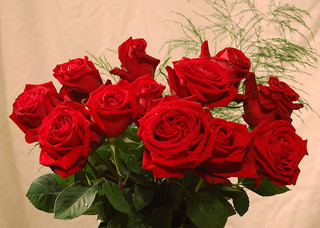

In [6]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

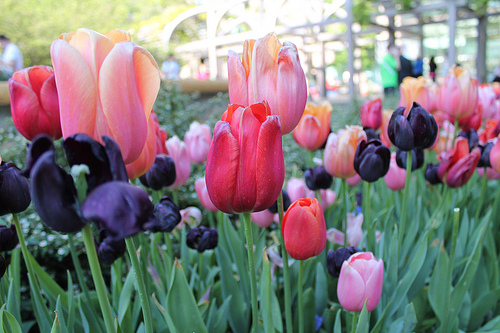

In [7]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[10]))

In [8]:
# read flowers images from disk into numpy arrays using opencv
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}
x, y = [], []
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_image = cv2.resize(img, (180, 180))
        x.append(resized_image)
        y.append(flowers_labels_dict[flower_name])

In [9]:
x = np.array(x)
y = np.array(y)
x[0]

array([[[ 71, 102, 123],
        [ 70, 103, 123],
        [ 73, 103, 122],
        ...,
        [138, 195, 220],
        [140, 196, 221],
        [140, 197, 222]],

       [[ 71, 102, 123],
        [ 71, 104, 124],
        [ 72, 103, 122],
        ...,
        [138, 195, 220],
        [138, 196, 221],
        [138, 198, 222]],

       [[ 72, 103, 124],
        [ 71, 102, 123],
        [ 74, 104, 123],
        ...,
        [139, 196, 221],
        [139, 196, 221],
        [141, 198, 223]],

       ...,

       [[ 63,  90, 111],
        [ 66,  93, 114],
        [ 65,  95, 114],
        ...,
        [  3, 119,  89],
        [  1, 119,  91],
        [  1, 112,  86]],

       [[ 63,  90, 111],
        [ 66,  93, 114],
        [ 67,  94, 114],
        ...,
        [  1, 113,  82],
        [  0, 118,  91],
        [  2, 110,  83]],

       [[ 63,  90, 111],
        [ 66,  93, 114],
        [ 67,  95, 115],
        ...,
        [  0, 106,  77],
        [  0, 110,  82],
        [  1, 103,  77]]

## train test split - scale images

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [11]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

## Build a CNN Model

In [15]:
model = Sequential([
    layers.Conv2D(32, 3, activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, activation = 'relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(5, activation = 'softmax')  
])
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])
model.fit(x_train_scaled, y_train, epochs = 30)

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:599: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


 7/92 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.2760 - loss: 2.0702

I0000 00:00:1709582167.152108      91 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1709582167.171003      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 74ms/step - accuracy: 0.3574 - loss: 1.5388
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5869 - loss: 1.0304
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6624 - loss: 0.8726
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7397 - loss: 0.6922
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8183 - loss: 0.4875
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8935 - loss: 0.2984
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9446 - loss: 0.1670
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9754 - loss: 0.0938
Epoch 9/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9893 - loss: 0.0429
Epoch 10/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9819 - loss: 0.0655
Epoch 11/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9727 - loss: 0.0921
Epoch 12/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9838 - 

In [16]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 87, 87, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 43, 43, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 41, 41, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,276,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,918,641 (37.84 MB)

 Trainable params: 3,306,213 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,612,428 (25.22 MB)

In [20]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
accuracy, loss

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5835 - loss: 3.1838


(0.6049046516418457, 3.2287437915802)

## improve test accuracy using Data Augmentation

In [36]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.4),
    layers.RandomZoom(0.1)
])

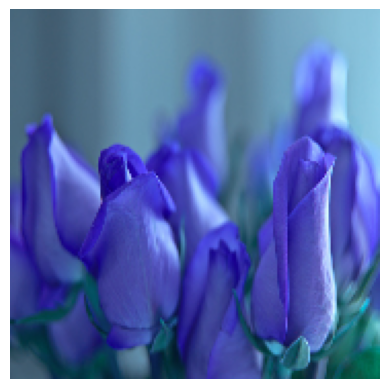

In [37]:
plt.axis('off')
plt.imshow(x[0])

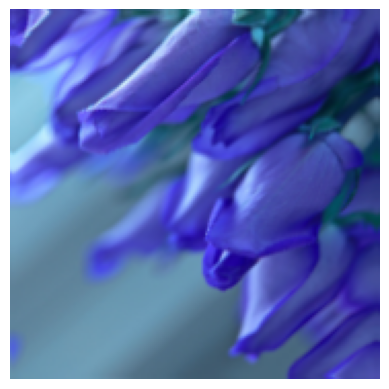

In [38]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype('uint8'))

In [46]:
model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, activation='relu', input_shape = (180, 180, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(5, activation = 'softmax')
])
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy']) 
model.fit(x_train_scaled, y_train, epochs=30)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:599: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2024-03-04 20:27:36.672053: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_10_1/dropout_8_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.3066 - loss: 1.6508
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.5234 - loss: 1.1339
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6157 - loss: 0.9904
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6298 - loss: 0.9094
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6578 - loss: 0.8712
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6793 - loss: 0.8087
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6793 - loss: 0.7952
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6925 - loss: 0.7858
Epoch 9/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6716 - loss: 0.8044
Epoch 10/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7051 - loss: 0.7505
Epoch 11/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.7450 - loss: 0.6770
Epoch 12/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.7415 - l

In [50]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6825 - loss: 0.8779


In [55]:
pred = model.predict(x_test_scaled)
pred[0]

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([2.6192405e-05, 9.9973303e-01, 5.0912375e-05, 4.8823422e-05,
       1.4099032e-04], dtype=float32)

In [56]:
np.argmax(pred[0])

1

In [57]:
y_test[0]

1